In [ ]:
import pandas as pd
import os

if (os.path.isfile("./Google-Playstore.csv.zip") == False):
    !wget -O Google-Playstore.csv.zip "http://140.115.82.55:7777/files/Google-Playstore.csv.zip"
    !unzip Google-Playstore.csv.zip

BI = pd.read_csv("Google-Playstore.csv")

BI.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,USD,2.7M,2.3 and up,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,USD,86M,5.1 and up,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,USD,5.8M,4.1 and up,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,USD,59M,4.4 and up,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,USD,29M,5.0 and up,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [ ]:
import numpy as np
app_name = np.array(BI['App Name'])
app_id = np.array(BI['App Id'])
app_category = np.array(BI['Category'])
app_rating = np.array(BI['Rating'])
app_rating_count = np.array(BI['Rating Count'])
app_min_install = np.array(BI['Minimum Installs'])
app_price = np.array(BI['Price'])
app_ad = np.array(BI['Ad Supported'])

In [ ]:
print(BI.nunique())

App Name             1046869
App Id               1118136
Category                  48
Rating                    42
Rating Count           34996
Installs                  22
Minimum Installs          22
Maximum Installs      207348
Free                       2
Price                    705
Currency                  54
Size                    1482
Minimum Android          139
Developer Id          165593
Developer Website     256899
Developer Email       261786
Released                3963
Last Updated            3706
Content Rating             6
Privacy Policy        380030
Ad Supported               2
In App Purchases           2
Editors Choice             2
dtype: int64


In [ ]:
print(BI['Rating'].isna().any())
print(BI.isna().sum())
print(BI['Rating'].mean(axis=0,skipna=True))

True
App Name                  1
App Id                    0
Category                  3
Rating                 6850
Rating Count           6850
Installs                161
Minimum Installs        161
Maximum Installs          0
Free                      0
Price                     0
Currency                161
Size                      0
Minimum Android        2013
Developer Id              2
Developer Website    414366
Developer Email          22
Released               7730
Last Updated              0
Content Rating            0
Privacy Policy       153524
Ad Supported              0
In App Purchases          0
Editors Choice            0
dtype: int64
2.490334441358455


In [ ]:
pd.set_option('display.max_columns', None)
print(BI.loc[BI['App Name']=='Shopping List Pro'])

                 App Name                       App Id  Category  Rating  \
266884  Shopping List Pro        hk.eu.shoppinglistpro  Shopping     0.0   
267198  Shopping List Pro  com.technix.shoppinglistpro  Shopping     4.3   
871150  Shopping List Pro           com.msamil.grocery  Shopping     4.2   

        Rating Count Installs  Minimum Installs  Maximum Installs   Free  \
266884           0.0       1+               1.0                 4  False   
267198         119.0   5,000+            5000.0              5189   True   
871150           5.0      10+              10.0                16   True   

        Price Currency  Size Minimum Android  \
266884   9.99      USD  2.3M      5.0 and up   
267198   0.00      USD  3.8M      4.2 and up   
871150   0.00      USD  3.5M      4.4 and up   

                             Developer Id              Developer Website  \
266884                      Harpreet Kaur  https://harpreetkaurapps.com/   
267198  Technix India Solutions Pvt. Ltd.    

In [ ]:
print(BI['Price'])
print(BI)
print(app_price)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1118131    0.0
1118132    0.0
1118133    0.0
1118134    0.0
1118135    0.0
Name: Price, Length: 1118136, dtype: float64
                                                  App Name  ... Editors Choice
0                                   HTTrack Website Copier  ...          False
1                            World War 2: Offline Strategy  ...          False
2                                                   WPSApp  ...          False
3        OfficeSuite - Office, PDF, Word, Excel, PowerP...  ...          False
4                                         Loud Player Free  ...          False
...                                                    ...  ...            ...
1118131                                        FleetEnable  ...          False
1118132                                          AutoThink  ...          False
1118133                                        FieldEnable  ...          False


In [ ]:
print(BI['Price'].all())
print(BI['Price'].isna().any())
print(BI['App Name'].isna().any()) # have na
print(BI['App Id'].isna().any())
print(BI['Category'].isna().any()) # have na
print(BI['Rating'].isna().any()) # have na
print(BI['Rating Count'].isna().any()) # have na
print(BI['Maximum Installs'].isna().any())
print(BI['Ad Supported'].isna().any())

False
False
True
False
True
False
True
False
False


篩選前為(1118136, 23)筆, 篩選後為(38976, 23)筆, 共篩選掉1079160


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score: 0.7024066091954023


Text(0, 0.5, 'Rating')

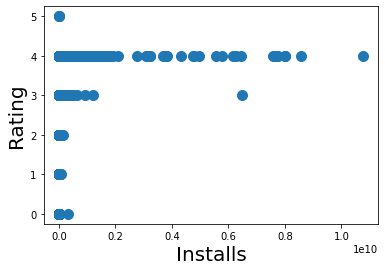

In [ ]:
# Modeling 1
# LR download rating
import sklearn
import matplotlib.pyplot as plt
BI['Rating']=BI['Rating'].fillna(0) #填補空值
mask = BI['Maximum Installs'] > 1000000
BI_dt = BI[mask]
print('篩選前為%s筆, 篩選後為%s筆, 共篩選掉%s' % (BI.shape, BI_dt.shape, BI.shape[0]-BI_dt.shape[0]))

X = BI_dt['Maximum Installs'].values.astype(int).reshape(-1,1)
y = BI_dt['Rating'].values.astype(int).reshape(-1,1)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X,y)
print("score:", clf.score(X, y))

plt.scatter(X,y,s=100)
plt.xlabel('Installs', fontsize=20)
plt.ylabel('Rating', fontsize=20)

篩選前為(1118136, 23)筆, 篩選後為(38976, 23)筆, 共篩選掉1079160
         Free  Ad Supported  In App Purchases
1        True          True              True
2        True          True             False
3        True          True              True
7        True          True              True
8        True          True              True
...       ...           ...               ...
1117462  True         False             False
1117741  True          True             False
1117995  True          True              True
1117997  True          True             False
1118103  True          True             False

[38976 rows x 3 columns]


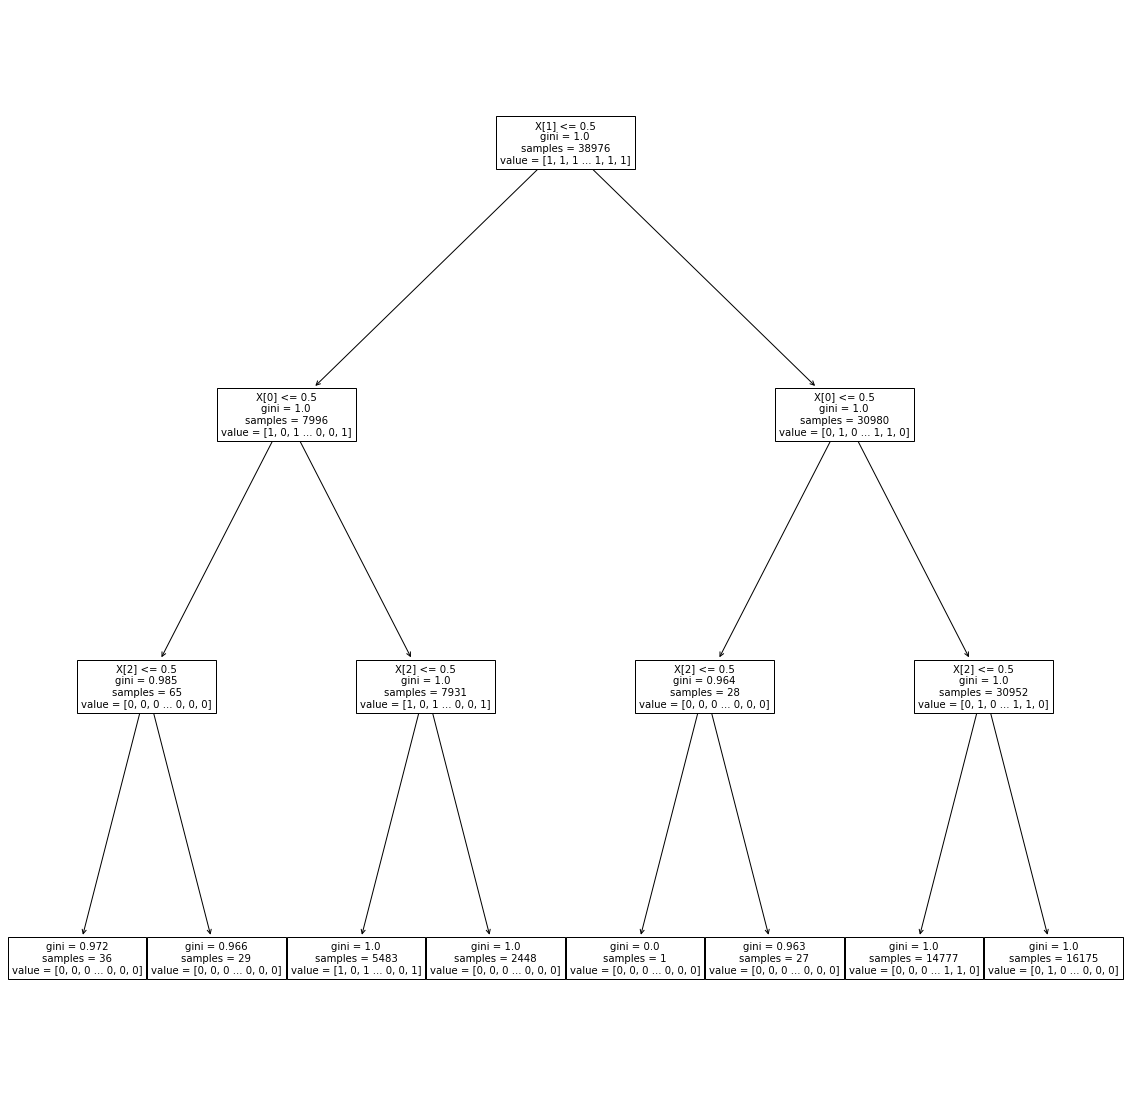

|--- feature_1 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 1008583
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1031196
|   |--- feature_0 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 1118145
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1000016
|--- feature_1 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 1192843
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1086669
|   |--- feature_0 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 1000016
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1000041



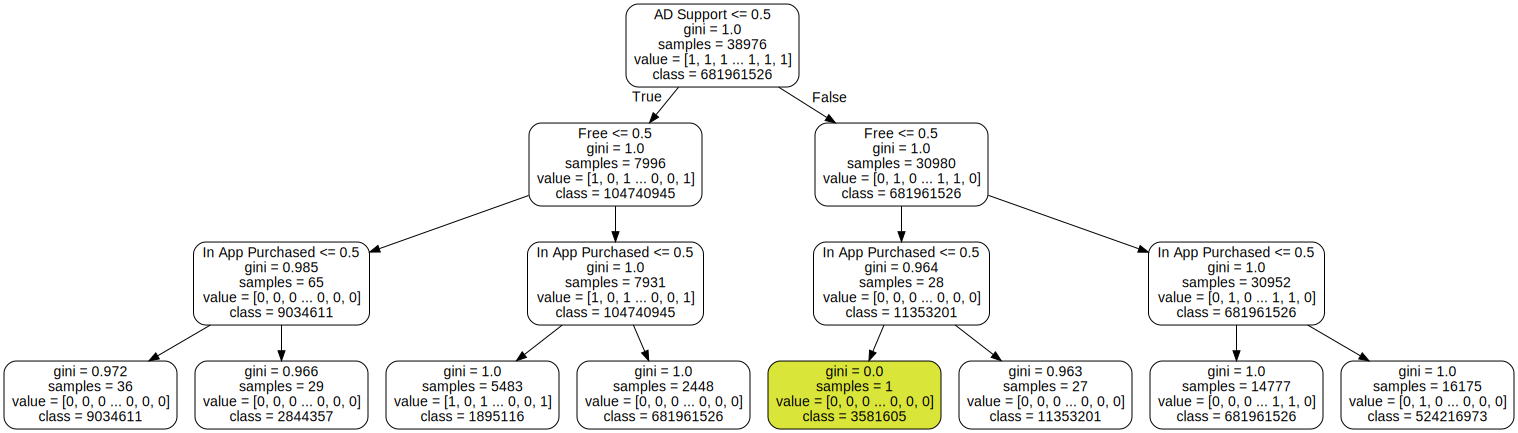

In [ ]:
# Modeling 2
# free, ad, in app perchase to download (DT)
from sklearn import tree

mask = BI['Maximum Installs'] > 1000000
BI_dt = BI[mask]
print('篩選前為%s筆, 篩選後為%s筆, 共篩選掉%s' % (BI.shape, BI_dt.shape, BI.shape[0]-BI_dt.shape[0]))

gx = BI_dt.iloc[:, [8,20,21]]
print(gx)

x = gx
y = BI_dt["Maximum Installs"].values.astype('int')

classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(x,y)

plt.figure(figsize=(20,20))
tree.plot_tree(classifier)
plt.show()

print(tree.export_text(classifier))

import graphviz

dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Free','AD Support','In App Purchased'],
                                class_names=BI_dt["Maximum Installs"].values.astype('str'),
                                rounded = True, filled=True)

graph = graphviz.Source(dot_data)

graph

In [ ]:
# Modeling 3
from sklearn.svm import SVC
BI['Rating']=BI['Rating'].fillna(0)
mask = BI['Maximum Installs'] > 50000000
BI_dt = BI[mask]
print('篩選前為%s筆, 篩選後為%s筆, 共篩選掉%s' % (BI.shape, BI_dt.shape, BI.shape[0]-BI_dt.shape[0]))
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
gx = BI_dt.iloc[:, [2,3,8]]
print(gx)
gx['Category'] = labelencoder.fit_transform(gx['Category'])
print(gx)
X = gx
y = BI_dt['Maximum Installs']
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
print(model.score(X, y))

篩選前為(1118136, 23)筆, 篩選後為(1233, 23)筆, 共篩選掉1116903
                  Category  Rating  Free
2                    Tools     4.2  True
3                 Business     4.2  True
13            Productivity     4.2  True
14       Maps & Navigation     4.4  True
16           Communication     4.4  True
...                    ...     ...   ...
759329              Action     4.3  True
799662              Racing     4.0  True
813435               Tools     2.8  True
918186              Social     4.3  True
1055204      Entertainment     3.5  True

[1233 rows x 3 columns]
         Category  Rating  Free
2              38     4.2  True
3               8     4.2  True
13             29     4.2  True
14             23     4.4  True
16             13     4.4  True
...           ...     ...   ...
759329          0     4.3  True
799662         31     4.0  True
813435         38     2.8  True
918186         35     4.3  True
1055204        16     3.5  True

[1233 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0.26682887266828875


In [ ]:
# Modeling 3 TEST 2 
from sklearn.svm import SVC
BI['Rating']=BI['Rating'].fillna(0)
mask = BI['Maximum Installs'] > 100000000
BI_dt = BI[mask]
print('篩選前為%s筆, 篩選後為%s筆, 共篩選掉%s' % (BI.shape, BI_dt.shape, BI.shape[0]-BI_dt.shape[0]))
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
gx = BI_dt.iloc[:, [2,3,8]]
print(gx)
gx['Category'] = labelencoder.fit_transform(gx['Category'])
print(gx)
X = gx
y = BI_dt['Maximum Installs']
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
print(model.score(X, y))

篩選前為(1118136, 23)筆, 篩選後為(538, 23)筆, 共篩選掉1117598
                  Category  Rating  Free
3                 Business     4.2  True
13            Productivity     4.2  True
14       Maps & Navigation     4.4  True
16           Communication     4.4  True
17             Photography     4.5  True
...                    ...     ...   ...
423721               Tools     4.3  True
500377       Music & Audio     4.2  True
500990               Tools     4.3  True
610484            Shopping     4.2  True
1055204      Entertainment     3.5  True

[538 rows x 3 columns]
         Category  Rating  Free
3               7     4.2  True
13             24     4.2  True
14             18     4.4  True
16             10     4.4  True
17             23     4.5  True
...           ...     ...   ...
423721         33     4.3  True
500377         20     4.2  True
500990         33     4.3  True
610484         28     4.2  True
1055204        13     3.5  True

[538 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0.379182156133829


In [ ]:
# Modeling 3 TEST 3 
from sklearn.svm import SVC
BI['Rating']=BI['Rating'].fillna(0)
mask = BI['Maximum Installs'] > 100000000
BI_dt = BI[mask]
print('篩選前為%s筆, 篩選後為%s筆, 共篩選掉%s' % (BI.shape, BI_dt.shape, BI.shape[0]-BI_dt.shape[0]))
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
gx = BI_dt.iloc[:, [2,3]]
print(gx)
gx['Category'] = labelencoder.fit_transform(gx['Category'])
print(gx)
X = gx
y = BI_dt['Maximum Installs']
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
print(model.score(X, y))
gx = BI_dt.iloc[:, [2,8]]
print(gx)
gx['Category'] = labelencoder.fit_transform(gx['Category'])
print(gx)
X = gx
y = BI_dt['Maximum Installs']
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
print(model.score(X, y))

篩選前為(1118136, 23)筆, 篩選後為(538, 23)筆, 共篩選掉1117598
                  Category  Rating
3                 Business     4.2
13            Productivity     4.2
14       Maps & Navigation     4.4
16           Communication     4.4
17             Photography     4.5
...                    ...     ...
423721               Tools     4.3
500377       Music & Audio     4.2
500990               Tools     4.3
610484            Shopping     4.2
1055204      Entertainment     3.5

[538 rows x 2 columns]
         Category  Rating
3               7     4.2
13             24     4.2
14             18     4.4
16             10     4.4
17             23     4.5
...           ...     ...
423721         33     4.3
500377         20     4.2
500990         33     4.3
610484         28     4.2
1055204        13     3.5

[538 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0.379182156133829
                  Category  Free
3                 Business  True
13            Productivity  True
14       Maps & Navigation  True
16           Communication  True
17             Photography  True
...                    ...   ...
423721               Tools  True
500377       Music & Audio  True
500990               Tools  True
610484            Shopping  True
1055204      Entertainment  True

[538 rows x 2 columns]
         Category  Free
3               7  True
13             24  True
14             18  True
16             10  True
17             23  True
...           ...   ...
423721         33  True
500377         20  True
500990         33  True
610484         28  True
1055204        13  True

[538 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.07063197026022305


In [ ]:
# Modeling 3 TEST 4 
from sklearn.svm import SVC
BI['Rating']=BI['Rating'].fillna(0)
mask = BI['Maximum Installs'] > 100000000
BI_dt = BI[mask]
print('篩選前為%s筆, 篩選後為%s筆, 共篩選掉%s' % (BI.shape, BI_dt.shape, BI.shape[0]-BI_dt.shape[0]))
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
gx = BI_dt.iloc[:, [2,3,8,20]]
print(gx)
gx['Category'] = labelencoder.fit_transform(gx['Category'])
print(gx)
X = gx
y = BI_dt['Maximum Installs']
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
print(model.score(X, y))

篩選前為(1118136, 23)筆, 篩選後為(538, 23)筆, 共篩選掉1117598
                  Category  Rating  Free  Ad Supported
3                 Business     4.2  True          True
13            Productivity     4.2  True         False
14       Maps & Navigation     4.4  True         False
16           Communication     4.4  True          True
17             Photography     4.5  True         False
...                    ...     ...   ...           ...
423721               Tools     4.3  True         False
500377       Music & Audio     4.2  True          True
500990               Tools     4.3  True         False
610484            Shopping     4.2  True          True
1055204      Entertainment     3.5  True          True

[538 rows x 4 columns]
         Category  Rating  Free  Ad Supported
3               7     4.2  True          True
13             24     4.2  True         False
14             18     4.4  True         False
16             10     4.4  True          True
17             23     4.5  True       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0.4721189591078067


In [ ]:
# Modeling 3 TEST 5 
from sklearn.svm import SVC
BI['Rating']=BI['Rating'].fillna(0)
mask = BI['Maximum Installs'] > 100000000
BI_dt = BI[mask]
print('篩選前為%s筆, 篩選後為%s筆, 共篩選掉%s' % (BI.shape, BI_dt.shape, BI.shape[0]-BI_dt.shape[0]))
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
gx = BI_dt.iloc[:, [2,3,8,20,21]]
print(gx)
gx['Category'] = labelencoder.fit_transform(gx['Category'])
print(gx)
X = gx
y = BI_dt['Maximum Installs']
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
print(model.score(X, y))

篩選前為(1118136, 23)筆, 篩選後為(538, 23)筆, 共篩選掉1117598
                  Category  Rating  Free  Ad Supported  In App Purchases
3                 Business     4.2  True          True              True
13            Productivity     4.2  True         False             False
14       Maps & Navigation     4.4  True         False             False
16           Communication     4.4  True          True              True
17             Photography     4.5  True         False             False
...                    ...     ...   ...           ...               ...
423721               Tools     4.3  True         False             False
500377       Music & Audio     4.2  True          True             False
500990               Tools     4.3  True         False             False
610484            Shopping     4.2  True          True             False
1055204      Entertainment     3.5  True          True             False

[538 rows x 5 columns]
         Category  Rating  Free  Ad Supported  In Ap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0.5650557620817844
